### Import Dependencies

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from prepare_data import download_and_unzip, read_data, get_filtered_history
from compute_metrics import compute_daily_var, compute_sigma_daily
from IPython.display import IFrame

### Define Input Parameters
- **years**: A list of the years included in the analysis.
- **assets_allocation**: A dictionary defining allocations for various assets.


In [22]:
years = [2024,
         2023,
         2022]

assets_allocation = {'HASH11': 20000,
                     'SOLH11': 30000,
                     'ETHE11': 10000}

# Part I.

## Download and Read data.

In this section, we download historical yearly data from [B3's official website](https://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/historico/mercado-a-vista/series-historicas/) for market data. 


⚠️ ***Note**: To automatically Download and Unzip the data uncomment the `download_and_unzip(years)` function below.*

In [131]:
# download_and_unzip(years)

Below, we use an `IFrame` to display the B3 Historical Data page directly within the notebook for reference.

In [154]:
url = "https://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/historico/mercado-a-vista/series-historicas/"
IFrame(url, width="100%", height="600px")

### Read Data into a DataFrame.

In [45]:
data = read_data(years, data_dir="data")

Reading data/2024/COTAHIST_A2024.TXT...
Reading data/2023/COTAHIST_A2023.TXT...
Reading data/2022/COTAHIST_A2022.TXT...


In [46]:
data.head()

,TIPREG,DATA_PREGAO,CODBDI,CODNEG,TPMERC,NOMRES,ESPECI,PRAZOT,MODREF,PREABE,...,TOTNEG,QUATOT,VOLTOT,PREEXE,INDOPC,DATVEN,FATCOT,PTOEXE,CODISI,DISMES
0,01,2024-01-02,02,AALR3,010,ALLIAR,ON NM,NaN,R$,10.20,...,1993,430400,401487500,0.0,0,99991231,1,0.0,BRAALRACNOR6,102
1,01,2024-01-02,02,ABCB4,010,ABC BRASIL,PN EJS N2,NaN,R$,23.98,...,8964,1944700,4494730800,0.0,0,99991231,1,0.0,BRABCBACNPR4,145
2,01,2024-01-02,02,ABEV3,010,AMBEV S/A,ON EJ,NaN,R$,13.72,...,16587,11690200,15983911100,0.0,0,99991231,1,0.0,BRABEVACNOR1,127
3,01,2024-01-02,02,BBDC3,010,BRADESCO,ON EJ N1,NaN,R$,15.26,...,6674,4545600,6857685400,0.0,0,99991231,1,0.0,BRBBDCACNOR1,764
4,01,2024-01-02,02,ALPA3,010,ALPARGATAS,ON N1,NaN,R$,10.11,...,20,2900,2912000,0.0,0,99991231,1,0.0,BRALPAACNOR0,231


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010425 entries, 0 to 7010424
Data columns (total 26 columns):
 #   Column       Dtype         
---  ------       -----         
 0   TIPREG       object        
 1   DATA_PREGAO  datetime64[ns]
 2   CODBDI       object        
 3   CODNEG       object        
 4   TPMERC       object        
 5   NOMRES       object        
 6   ESPECI       object        
 7   PRAZOT       object        
 8   MODREF       object        
 9   PREABE       float64       
 10  PREMAX       float64       
 11  PREMIN       float64       
 12  PREMED       float64       
 13  PREULT       float64       
 14  PREOFC       float64       
 15  PREOFV       float64       
 16  TOTNEG       int32         
 17  QUATOT       int64         
 18  VOLTOT       int64         
 19  PREEXE       float64       
 20  INDOPC       object        
 21  DATVEN       object        
 22  FATCOT       int16         
 23  PTOEXE       float64       
 24  CODISI       object     

## Filter and Preprocess Data.

In [49]:
df = get_filtered_history(data, assets_allocation)

In [50]:
df.head()

CODNEG,ETHE11,HASH11,SOLH11
DATA_PREGAO,,,
2022-01-03,61.86,49.31,NaN
2022-01-04,65.00,50.22,NaN
2022-01-05,62.00,48.88,NaN
2022-01-06,58.25,46.95,NaN
2022-01-07,54.40,44.45,NaN


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 749 entries, 2022-01-03 to 2024-12-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ETHE11  749 non-null    float64
 1   HASH11  749 non-null    float64
 2   SOLH11  78 non-null     float64
dtypes: float64(3)
memory usage: 23.4 KB


## Data Vizualization

In [52]:
df_melted = df.reset_index().melt(id_vars='DATA_PREGAO', 
                                           value_vars=assets_allocation.keys(), 
                                           var_name='CODNEG', 
                                           value_name='Price')

total_alloc = sum(assets_allocation.values())

df_portfolio = df[list(assets_allocation.keys())].mul(
    list(assets_allocation.values()), axis=1
).sum(axis=1) 

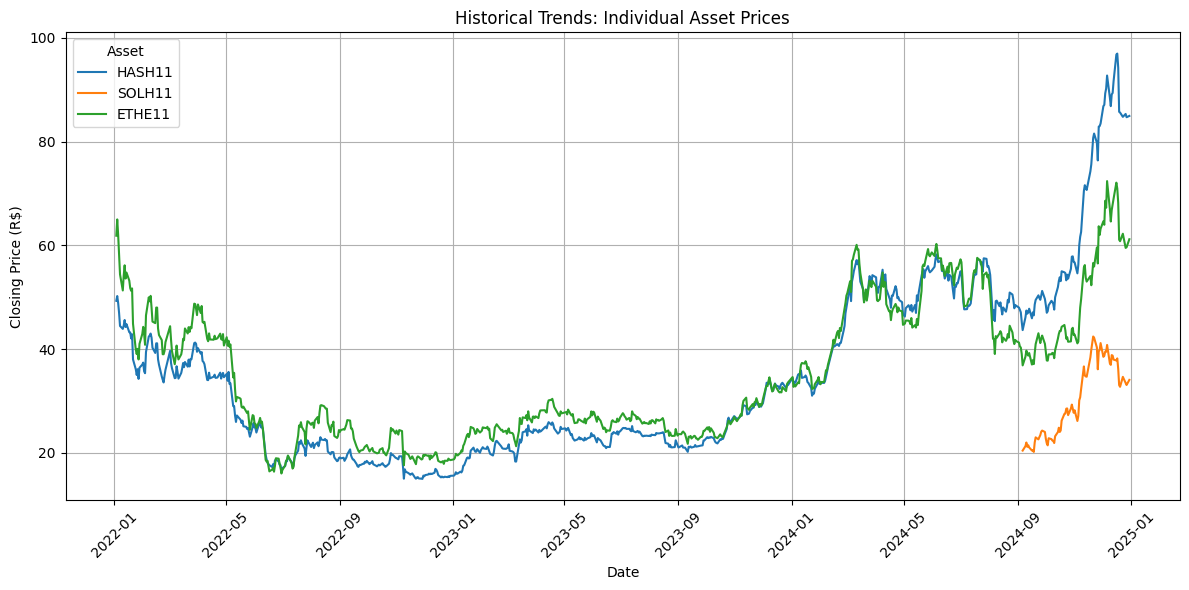

In [58]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x="DATA_PREGAO", y="Price", hue="CODNEG")

# Adding labels and title
plt.title("Historical Trends: Individual Asset Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price (R$)")
plt.legend(title="Asset")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()

plt.show()

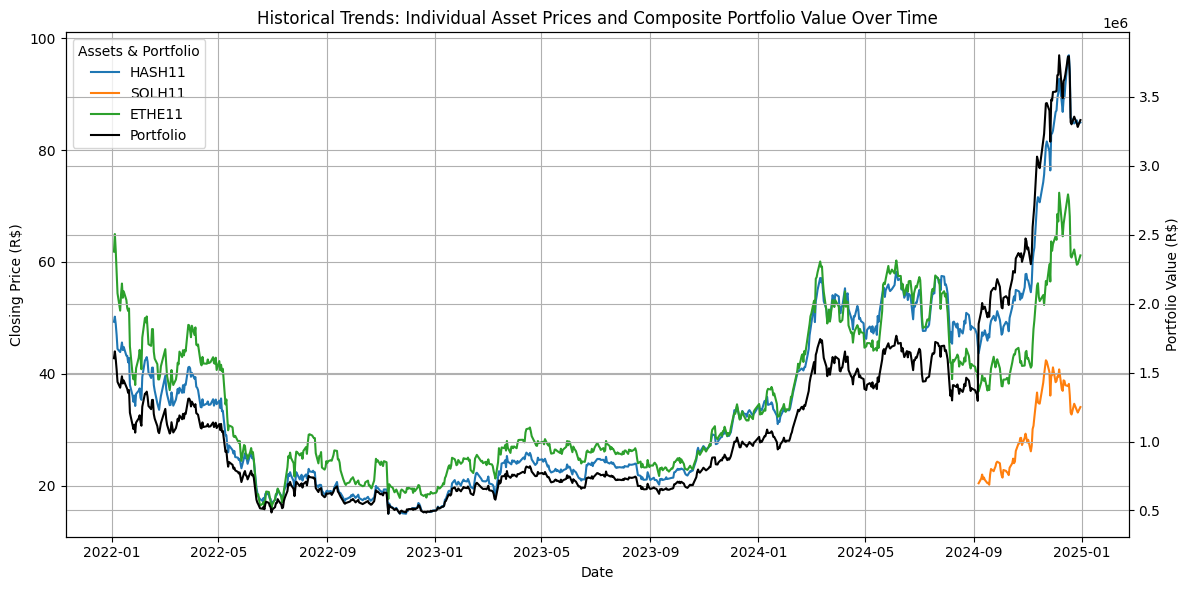

In [59]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Plot the individual asset time series on the first y-axis (ax1)
sns.lineplot(data=df_melted, x="DATA_PREGAO", y="Price", hue="CODNEG", ax=ax1)
ax1.set_xlabel("Date")
ax1.set_ylabel("Closing Price (R$)")
ax1.set_title("Historical Trends: Individual Asset Prices and Composite Portfolio Value Over Time")
ax1.grid(True)  # Add grid lines to ax1

# Plot the portfolio weighted average on the second y-axis (ax2)
ax2.plot(df_portfolio.index, df_portfolio, label='Portfolio', color='black')
ax2.set_ylabel("Portfolio Value (R$)")
ax2.grid(True)  # Add grid lines to ax1

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, title="Assets & Portfolio", loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Part II.

For constructing the VaR model, we use the following formulation:

$$
\mathrm{VaR_{daily}} = z_{\alpha} \times \sigma_{\mathrm{daily}}
$$

Where:
- $\alpha$: significance level (confidence = 1 - $\alpha$)
- $z_{\alpha}$: number of standard deviations corresponding to the given significance in a standard normal distribution $N(0,1)$
- $\sigma_{\mathrm{daily}}$: estimate of daily standard deviation

For computing $\sigma_{\mathrm{daily}}$ with $n$ assets:

$$
\sigma_{\mathrm{daily}}^2 = \omega^T \Sigma \omega
$$

where

$$
\omega =
\begin{pmatrix}
w_1 \\
w_2 \\
\vdots \\
w_n
\end{pmatrix}
\quad\text{and}\quad
\Sigma =
\begin{pmatrix}
\sigma_{11} & \sigma_{12} & \dots & \sigma_{1n} \\
\sigma_{21} & \sigma_{22} & \dots & \sigma_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_{n1} & \sigma_{n2} & \dots & \sigma_{nn}
\end{pmatrix},
$$

with $\Sigma\$ being the covariance matrix.

Also, the EWMA (co)variance estimator is

$$
\sigma_{j,i,t+1 \mid t}^2 
= \lambda \times \sigma_{j,i,t \mid t-1}^2 
+ (1 - \lambda)\, r_{i,t}\, r_{j,t}
$$


Where:
- $r_{i,t}$: daily return of asset $i$ at time $t$.

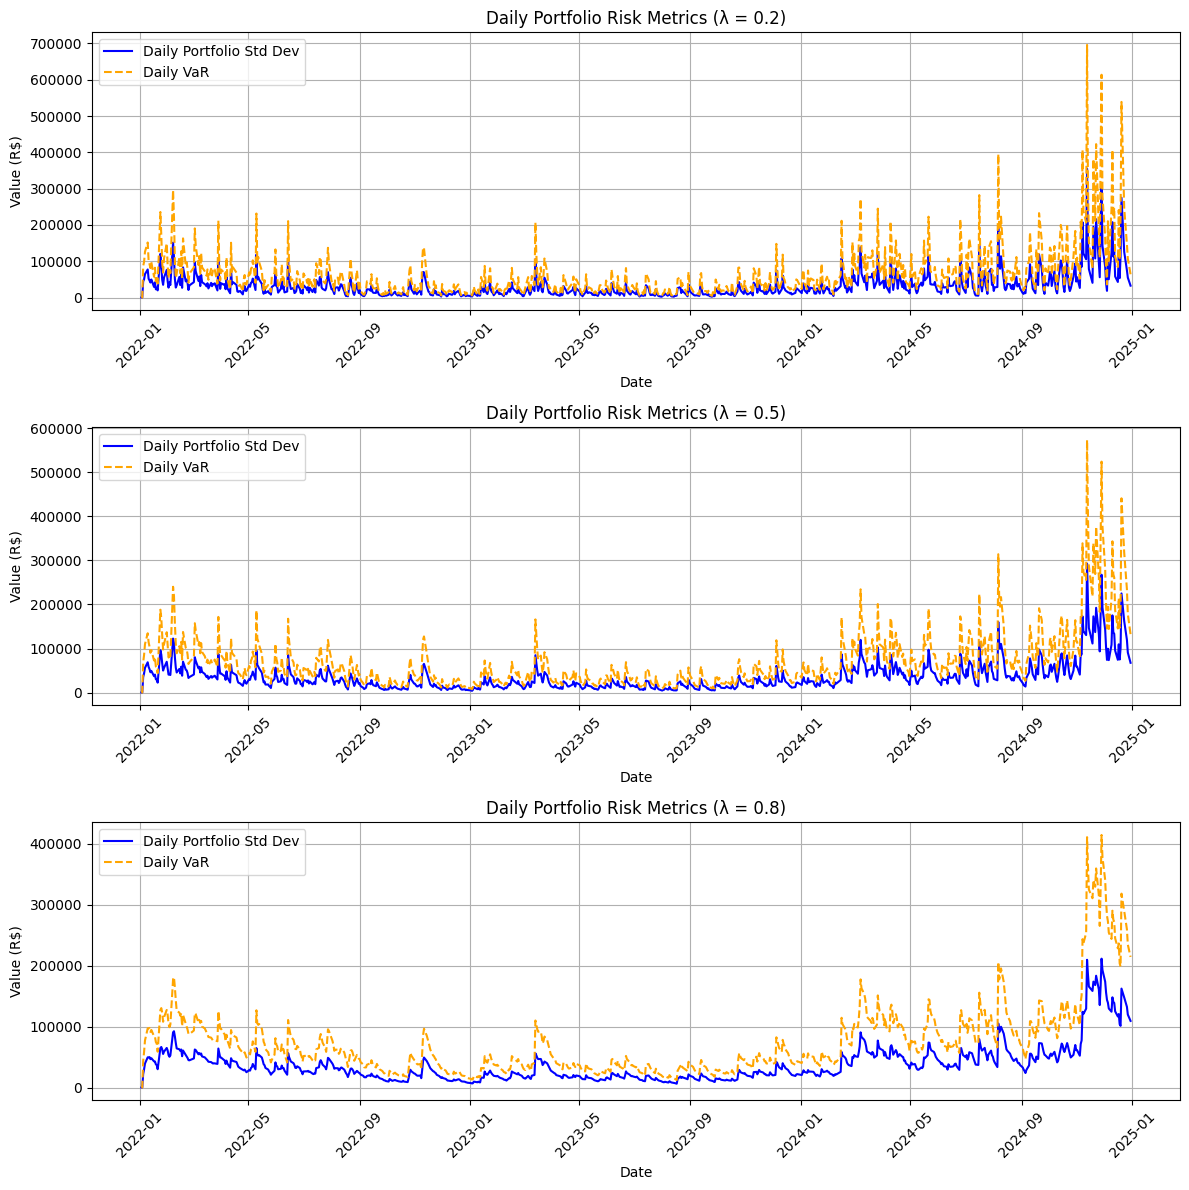

In [43]:
ewma_values = [0.2, 0.5, 0.8]
alpha = 0.05
initial_sigma = 0.0
df_returns = df.pct_change().fillna(0)

fig, axes = plt.subplots(nrows=len(ewma_values), ncols=1, figsize=(12, len(ewma_values) * 4))

for ax, ewma_decay in zip(axes, ewma_values):
    sigma_daily = compute_sigma_daily(assets_allocation, df, df_returns, ewma_decay, initial_sigma)
    daily_var = compute_daily_var(sigma_daily, alpha)

    ax.plot(df.index, sigma_daily, label="Daily Portfolio Std Dev", color="blue")
    ax.plot(df.index, daily_var, label="Daily VaR", linestyle="--", color="orange")

    ax.set_title(f"Daily Portfolio Risk Metrics (λ = {ewma_decay})")
    ax.set_xlabel("Date")
    ax.set_ylabel("Value (R$)")
    ax.legend()
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()